In [51]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16104 non-null  int64  
 1   iso2c              16043 non-null  object 
 2   country            16104 non-null  object 
 3   year               16104 non-null  int64  
 4   EN.ATM.PM25.MC.M3  2880 non-null   float64
 5   EN.ATM.PM25.MC.ZS  2880 non-null   float64
 6   EG.EGY.PRIM.PP.KD  4970 non-null   float64
 7   EG.FEC.RNEW.ZS     6588 non-null   float64
 8   EG.ELC.RNEW.ZS     6838 non-null   float64
 9   EG.ELC.ACCS.ZS     6174 non-null   float64
 10  EG.CFT.ACCS.ZS     3995 non-null   float64
 11  AG.LND.FRST.ZS     6857 non-null   float64
 12  NY.GDP.TOTL.RT.ZS  10816 non-null  float64
 13  ER.LND.PTLD.ZS     770 non-null    float64
 14  ER.PTD.TOTL.ZS     769 non-null    float64
 15  ER.MRN.PTMR.ZS     607 non-null    float64
 16  EG.ELC.ACCS.UR.ZS  612

In [53]:
# Import data
df_wdi = pd.read_csv('WDI-Environment-No-Commas.csv', encoding='utf-8', sep=";")
df_esg = pd.read_csv('ESGData.csv')

df_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16104 entries, 0 to 16103
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16104 non-null  int64  
 1   iso2c              16043 non-null  object 
 2   country            16104 non-null  object 
 3   year               16104 non-null  int64  
 4   EN.ATM.PM25.MC.M3  2880 non-null   float64
 5   EN.ATM.PM25.MC.ZS  2880 non-null   float64
 6   EG.EGY.PRIM.PP.KD  4970 non-null   float64
 7   EG.FEC.RNEW.ZS     6588 non-null   float64
 8   EG.ELC.RNEW.ZS     6838 non-null   float64
 9   EG.ELC.ACCS.ZS     6174 non-null   float64
 10  EG.CFT.ACCS.ZS     3995 non-null   float64
 11  AG.LND.FRST.ZS     6857 non-null   float64
 12  NY.GDP.TOTL.RT.ZS  10816 non-null  float64
 13  ER.LND.PTLD.ZS     770 non-null    float64
 14  ER.PTD.TOTL.ZS     769 non-null    float64
 15  ER.MRN.PTMR.ZS     607 non-null    float64
 16  EG.ELC.ACCS.UR.ZS  612

In [47]:
# Fix esg data to follow format of country and year as unit

# Create an empty DataFrame with no columns
df_new_esg = pd.DataFrame()
df_new_esg['country'] = None 

# Start at negative one to offset +1 for first row where value hasn't been placed yet
country_index = -1

# Each row is a country and one indicator variable, listing values for each year 1960 to 2020
for i in range(len(df_esg)):
    country = df_esg.loc[i, 'Country Name']
    indicator_code = df_esg.loc[i, 'Indicator Code']

    # Check if country name exists in dataframe already
    if not (df_new_esg['country'] == country).any():
        country_index += 1

    # Iterate through years in the row
    for j in range(1960, 2021):
        year_value = df_esg.loc[i, str(j)]

        # Add country and year to dataframe
        df_new_esg.loc[(country_index*61)+(j-1960), 'country'] = country
        df_new_esg.loc[(country_index*61)+(j-1960), 'year'] = j

        # Add new indicator value to dataframe
        df_new_esg.loc[(country_index*61)+(j-1960), str(indicator_code)] = year_value
df_new_esg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 0 to 14578
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            14579 non-null  object 
 1   year               14579 non-null  float64
 2   EG.CFT.ACCS.ZS     3995 non-null   float64
 3   EG.ELC.ACCS.ZS     5599 non-null   float64
 4   NY.ADJ.DRES.GN.ZS  8949 non-null   float64
 5   NY.ADJ.DFOR.GN.ZS  9393 non-null   float64
 6   AG.LND.AGRI.ZS     12076 non-null  float64
 7   NV.AGR.TOTL.ZS     9400 non-null   float64
 8   ER.H2O.FWTL.ZS     670 non-null    float64
 9   SI.SPR.PCAP.ZG     92 non-null     float64
 10  SH.DTH.COMM.ZS     916 non-null    float64
 11  SL.TLF.0714.ZS     281 non-null    float64
 12  EN.ATM.CO2E.PC     12289 non-null  float64
 13  CC.EST             3970 non-null   float64
 14  EN.CLC.CDDY.XD     0 non-null      float64
 15  EN.CLC.MDAT.ZS     165 non-null    float64
 16  IC.BUS.EASE.XQ     185 non-

In [63]:
# Merge the data

# Merge on country and year with outer to keep all entities
data = df_wdi.merge(df_new_esg, on=['country', 'year'], how='outer')

# Save the combined DataFrame to a new CSV file
data.to_csv('Data.csv', index=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17080 entries, 0 to 17079
Data columns (total 99 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16104 non-null  float64
 1   iso2c                16043 non-null  object 
 2   country              17080 non-null  object 
 3   year                 17080 non-null  float64
 4   EN.ATM.PM25.MC.M3_x  2880 non-null   float64
 5   EN.ATM.PM25.MC.ZS    2880 non-null   float64
 6   EG.EGY.PRIM.PP.KD_x  4970 non-null   float64
 7   EG.FEC.RNEW.ZS_x     6588 non-null   float64
 8   EG.ELC.RNEW.ZS_x     6838 non-null   float64
 9   EG.ELC.ACCS.ZS_x     6174 non-null   float64
 10  EG.CFT.ACCS.ZS_x     3995 non-null   float64
 11  AG.LND.FRST.ZS_x     6857 non-null   float64
 12  NY.GDP.TOTL.RT.ZS    10816 non-null  float64
 13  ER.LND.PTLD.ZS       770 non-null    float64
 14  ER.PTD.TOTL.ZS_x     769 non-null    float64
 15  ER.MRN.PTMR.ZS       607 non-null   

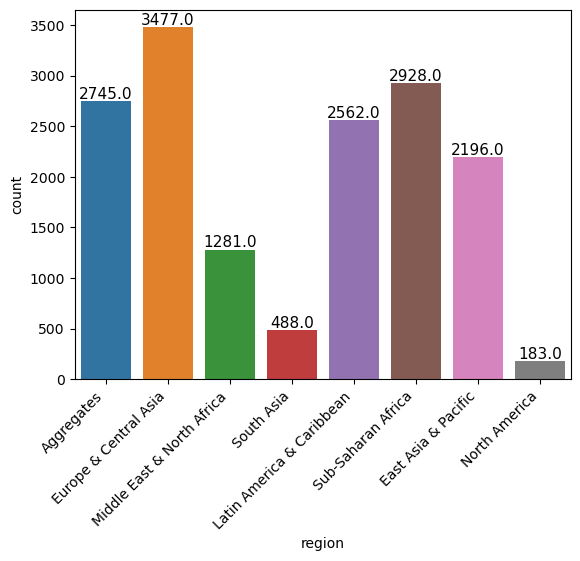

In [66]:
# Explore data: Seaborn/Plotly (eg. histograms)

# Count the number of data points for each region
ax = sns.countplot(x='region', data=data);

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45);

# Adjust x-axis labels position
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()